# Meta Methods

In [ ]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
import pandas as pd
import time

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
data = pd.read_csv('games_clean.csv')

In [ ]:
column = data.columns.get_loc('Metacritic')
y = data.iloc[:,column]
X = data.loc[:, data.columns != 'Metacritic']

In [ ]:
data.loc[:, data.columns != 'Metacritic']

## Voting scheme

In [ ]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=100

clf1 = GaussianNB()

clf2 = KNeighborsClassifier(n_neighbors=5,weights='distance')

clf3 = DecisionTreeClassifier(max_depth=13, criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))
    

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))


In [ ]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[1,1,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
import time

lb=[]
lb_time=[]
for nest in [1,2,5,10,20,50,100]:
    start = time.time()
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=13, criterion='entropy'),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    lb_time.append(time.time() - start)
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

In [ ]:
lb2=[]    
lb2_time=[]
for nest in [1,2,5,10,20,50,100]:
    start = time.time()
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=13, criterion='entropy'),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    lb2_time.append(time.time()  - start)
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

In [ ]:
plt.plot([1,2,5,10,20,50,100],lb,label="Bagging DT")
plt.show()
plt.plot([1,2,5,10,20,50,100],lb2,label="Bagging DT forced variance")
plt.show()
plt.plot([1,2,5,10,20,50,100],lb_time,label="Bagging DT", color = "red")
plt.show()
plt.plot([1,2,5,10,20,50,100],lb2_time,label="Bagging DT forced variance", color = "red")
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
timeestamp=[]
for nest in [1,2,5,10,20,50,100]:
    start = time.time()
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest, max_depth=13, criterion = 'entropy',n_jobs=-1), X, y, cv=100, scoring='accuracy', n_jobs=-1)
    end = time.time()
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())
    timeestamp.append(end-start)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
timeestamp=[]
for nest in [1,2,5,10,20,50,100]:
    start = time.time()
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest, max_depth=13, criterion = 'entropy', n_jobs=-1), X, y, cv=100, scoring='accuracy', n_jobs=-1)
    end = time.time()
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())
    timeestamp.append(end-start)

[4.974161386489868, 5.228057384490967, 5.804358720779419, 7.4612414836883545, 11.139129400253296, 20.187734603881836, 36.68946099281311]


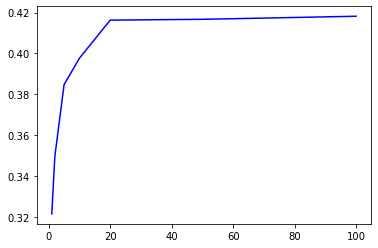

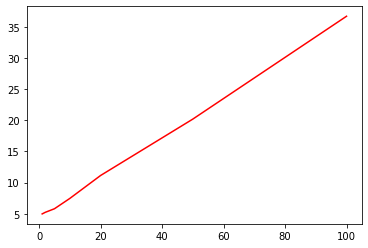

In [9]:
fig1, ax1 = plt.subplots()
ax1.plot([1,2,5,10,20,50,100],lext, color='b')
fig2, ax2 = plt.subplots()
ax2.plot([1,2,5,10,20,50,100],timeestamp, color='r')
print(timeestamp)

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=13, criterion='entropy'),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

In [ ]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()